# Gradient descent

Let's visualize the gradient descent algorithm.

We consider the following function:
$$
f(x, y) = 2x^2 + y^2
$$
Let's plot it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib notebook
%matplotlib widget 
# requires ipympl

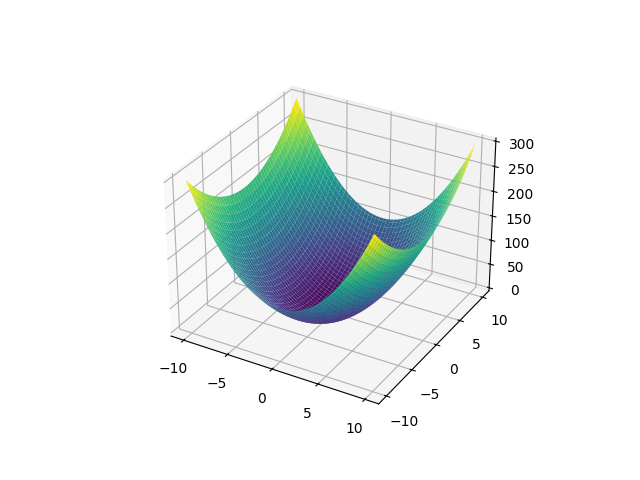

In [2]:
# define f
def f(x,y):
    return 2*x**2 + y**2

# plot f

x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z,cmap='viridis')
plt.show()


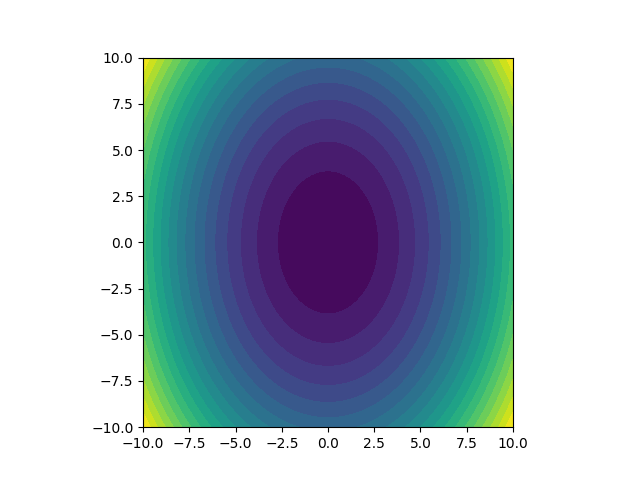

In [3]:
# contour plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X,Y,Z,levels=20,cmap='viridis')
ax.set_aspect('equal')
plt.show()

Let's implement the gradient descent algorithm to find the minimum of this function (which we know is at $(0, 0)$).

In [4]:
# gradient of f 
def grad_f(x,y):
    return np.array([4*x,2*y])
  
# gradient descent 
def gradient_descent(x0,y0,learning_rate=0.1,steps=10):
  x = x0
  y = y0
  list_of_points = [(x,y)]
  for i in range(steps):
      grad = grad_f(x,y)
      x = x - learning_rate*grad[0]
      y = y - learning_rate*grad[1]
      list_of_points.append((x,y))
  return list_of_points

In [5]:
x0 = 10.
y0 = 10.
steps = 10
learning_rate = 0.2
list_of_points_interact = gradient_descent(x0,y0,learning_rate,steps)
list_of_points_interact = np.array(list_of_points_interact)
def plot_gradient_descent(step=1):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  x = np.linspace(-10,10,100)
  y = np.linspace(-10,10,100)
  X,Y = np.meshgrid(x,y)
  Z = f(X,Y)
  ax.contourf(X,Y,Z,levels=20,cmap='viridis')
  ax.set_aspect('equal')
  # plot bullet points
  ax.plot(list_of_points_interact[:step,0],list_of_points_interact[:step,1],'o',color='red')
  ax.plot(list_of_points_interact[:step,0],list_of_points_interact[:step,1],color='r')
  plt.show()
  
print("Last point: ", list_of_points_interact[-1])
print("Gradient at last point: ", grad_f(list_of_points_interact[-1][0],list_of_points_interact[-1][1]))
print("Value of f at last point: ", f(list_of_points_interact[-1][0],list_of_points_interact[-1][1]))
widgets.interact(plot_gradient_descent,step=(1,steps,1))

Last point:  [1.0240000e-06 6.0466176e-02]
Gradient at last point:  [4.09600000e-06 1.20932352e-01]
Value of f at last point:  0.003656158442160124


interactive(children=(IntSlider(value=1, description='step', max=10, min=1), Output()), _dom_classes=('widget-…

<function __main__.plot_gradient_descent(step=1)>

### Problem: suitable choice of learning rate

The learning rate is a hyperparameter that controls how much we are adjusting the weights of our network with respect the loss gradient. If the learning rate is too large, the algorithm can get stuck or, even worse, diverge. If the learning rate is too small, the algorithm will take too long to converge.

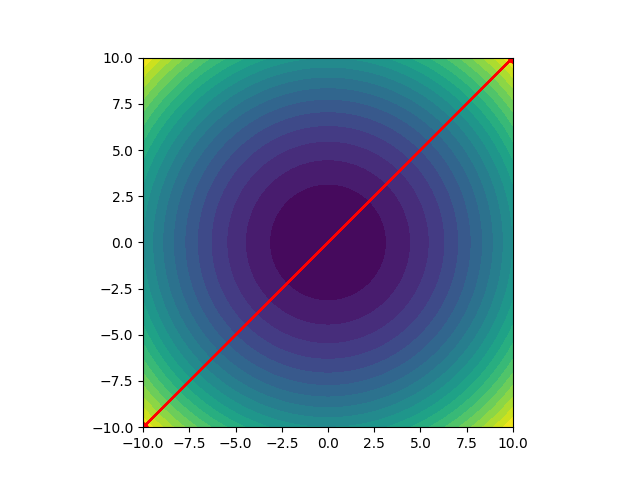

[[ 10.  10.]
 [-10. -10.]
 [ 10.  10.]
 [-10. -10.]
 [ 10.  10.]
 [-10. -10.]
 [ 10.  10.]
 [-10. -10.]
 [ 10.  10.]
 [-10. -10.]
 [ 10.  10.]]
Cost during gradient descent: 
200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 200.0 

In [6]:
# define f
def f(x,y):
    return x**2 + y**2

# gradient of f 
def grad_f(x,y):
    return np.array([2*x,2*y])
  
# gradient descent 
def gradient_descent(x0,y0,learning_rate=0.1,steps=10):
  x = x0
  y = y0
  list_of_points = [(x,y)]
  for i in range(steps):
      grad = grad_f(x,y)
      x = x - learning_rate*grad[0]
      y = y - learning_rate*grad[1]
      list_of_points.append((x,y))
  return list_of_points
  
x0 = 10.
y0 = 10.
steps = 10
learning_rate = 1
list_of_points = gradient_descent(x0,y0,learning_rate,steps)
list_of_points = np.array(list_of_points)
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
ax.contourf(X,Y,Z,levels=20,cmap='viridis')
ax.set_aspect('equal')
# plot bullet points
ax.plot(list_of_points[:,0],list_of_points[:,1],'o',color='red')
ax.plot(list_of_points[:,0],list_of_points[:,1],color='r')
plt.show()
print(list_of_points)
# cost during gradient descent
print("Cost during gradient descent: ")
for i in range(len(list_of_points)):
    print(f(list_of_points[i][0],list_of_points[i][1]), end=' ')

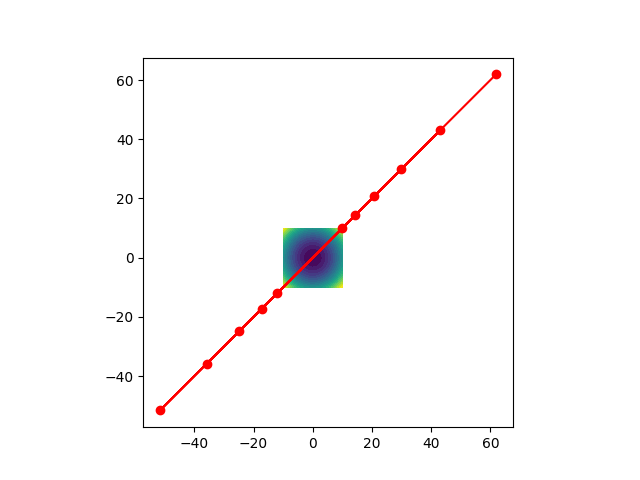

[[ 10.          10.        ]
 [-12.         -12.        ]
 [ 14.4         14.4       ]
 [-17.28       -17.28      ]
 [ 20.736       20.736     ]
 [-24.8832     -24.8832    ]
 [ 29.85984     29.85984   ]
 [-35.831808   -35.831808  ]
 [ 42.9981696   42.9981696 ]
 [-51.59780352 -51.59780352]
 [ 61.91736422  61.91736422]]
Cost during gradient descent: 
200.0 288.0 414.72000000000014 597.1968000000003 859.9633920000007 1238.3472844800012 1783.2200896512027 2567.8369290977334 3697.6851779007375 5324.6666561770635 7667.519984894974 

In [7]:
x0 = 10.
y0 = 10.
steps = 10
learning_rate = 1.1
list_of_points = gradient_descent(x0,y0,learning_rate,steps)
list_of_points = np.array(list_of_points)
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
ax.contourf(X,Y,Z,levels=20,cmap='viridis')
ax.set_aspect('equal')
# plot bullet points
ax.plot(list_of_points[:,0],list_of_points[:,1],'o',color='red')
ax.plot(list_of_points[:,0],list_of_points[:,1],color='r')
plt.show()
print(list_of_points)
# cost during gradient descent
print("Cost during gradient descent: ")
for i in range(len(list_of_points)):
    print(f(list_of_points[i][0],list_of_points[i][1]), end=' ')

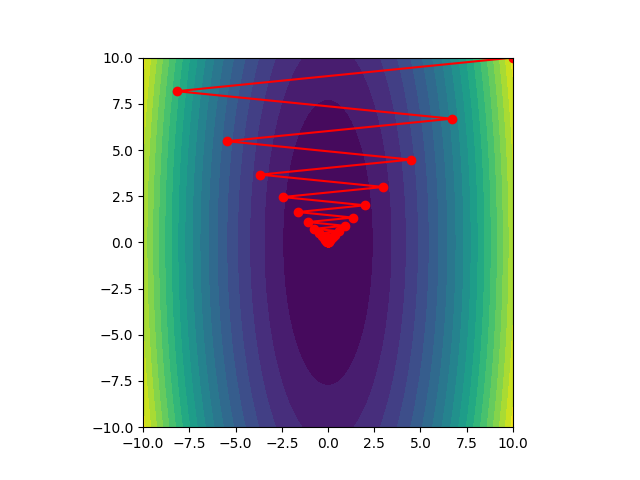

In [8]:
# define f
def f(x,y):
    return 10*x**2 + y**2

# gradient of f 
def grad_f(x,y):
    return np.array([10*2*x,2*y])
  
# gradient descent 
def gradient_descent(x0,y0,learning_rate=0.1,steps=10):
  x = x0
  y = y0
  list_of_points = [(x,y)]
  for i in range(steps):
      grad = grad_f(x,y)
      x = x - learning_rate*grad[0]
      y = y - learning_rate*grad[1]
      list_of_points.append((x,y))
  return list_of_points
  
x0 = 10.
y0 = 10.
steps = 100
learning_rate = 1/11
list_of_points = gradient_descent(x0,y0,learning_rate,steps)
list_of_points = np.array(list_of_points)
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
ax.contourf(X,Y,Z,levels=20,cmap='viridis')
ax.set_aspect('equal')
# plot bullet points
ax.plot(list_of_points[:,0],list_of_points[:,1],'o',color='red')
ax.plot(list_of_points[:,0],list_of_points[:,1],color='r')
plt.show()

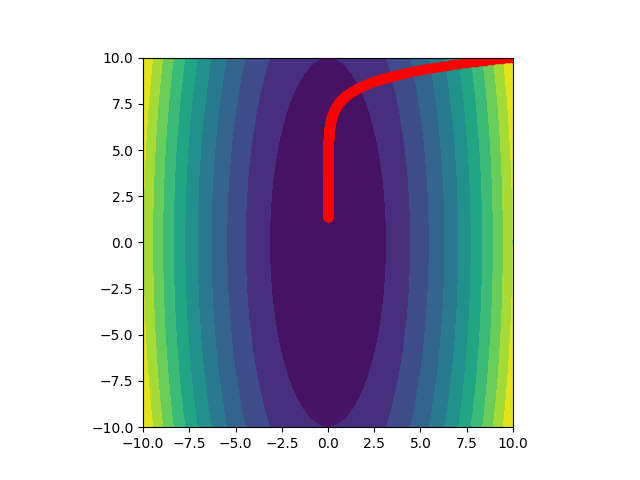

Last point:  [1.68296736e-08 1.35064522e+00]
Gradient at last point:  [3.36593471e-07 2.70129045e+00]
Value of f at last point:  1.8242425223750767


In [9]:
x0 = 10.
y0 = 10.
steps = 1000
learning_rate = 0.001
list_of_points = gradient_descent(x0,y0,learning_rate,steps)
list_of_points = np.array(list_of_points)
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
ax.contourf(X,Y,Z,levels=10,cmap='viridis')
ax.set_aspect('equal')
# plot bullet points
ax.plot(list_of_points[:,0],list_of_points[:,1],'o',color='red')
ax.plot(list_of_points[:,0],list_of_points[:,1],color='r')
plt.show()
print("Last point: ", list_of_points[-1])
print("Gradient at last point: ", grad_f(list_of_points[-1][0],list_of_points[-1][1]))
print("Value of f at last point: ", f(list_of_points[-1][0],list_of_points[-1][1]))

### Solution: learning rate schedule

A learning rate schedule is a way to adjust the learning rate during training. We can use a learning rate schedule to decrease the learning rate as the training progresses.

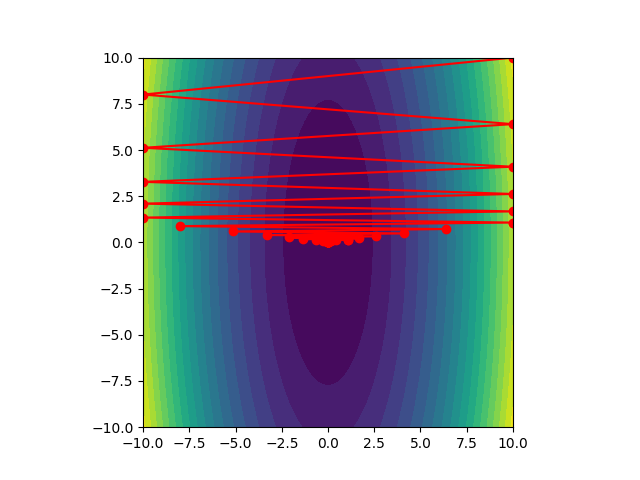

Last point:  [1.77179665e-98 6.43586355e-09]
Gradient at last point:  [3.54359330e-97 1.28717271e-08]
Value of f at last point:  4.142033967401874e-17


In [10]:
# learning rate schedule
x0 = 10.
y0 = 10.
intermediate_steps = 10
learning_rate = 0.1
list_of_points = []
for i in range(100):
  list_of_points.extend(gradient_descent(x0,y0,learning_rate,intermediate_steps))
  x0, y0 = list_of_points[-1]
  learning_rate = learning_rate*0.9  
list_of_points = np.array(list_of_points)

fig = plt.figure()
ax = fig.add_subplot(111)
x = np.linspace(-10,10,100)
y = np.linspace(-10,10,100)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
ax.contourf(X,Y,Z,levels=20,cmap='viridis')
ax.set_aspect('equal')
# plot bullet points
ax.plot(list_of_points[:,0],list_of_points[:,1],'o',color='red')
ax.plot(list_of_points[:,0],list_of_points[:,1],color='r')
plt.show()
print("Last point: ", list_of_points[-1])
print("Gradient at last point: ", grad_f(list_of_points[-1][0],list_of_points[-1][1]))
print("Value of f at last point: ", f(list_of_points[-1][0],list_of_points[-1][1]))

### Problem: local minima

Even when the learning rate is well chosen, the gradient descent algorithm can get stuck around a local minimum.

Let's consider the following function:
$$
f(x, y) = x^2 + y^2 + \sin(5x) + \sin(5y)
$$

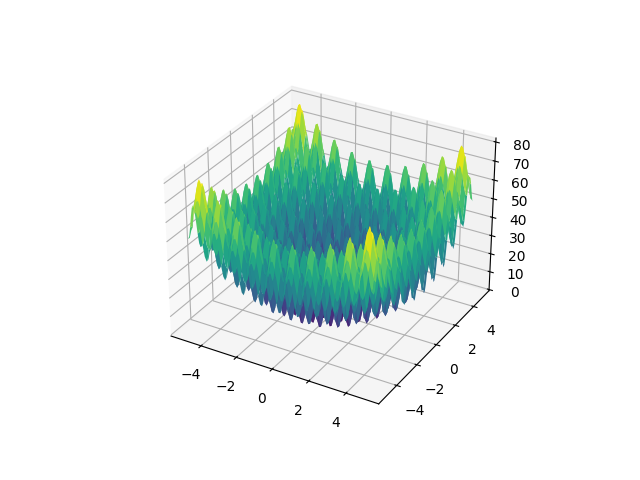

In [11]:
# define f 
def f(x,y):
    return 20 + x**2 - 10*np.cos(2*np.pi*x) + y**2 - 10*np.cos(2*np.pi*y)
 
# plot f

x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z,cmap='viridis')
plt.show()

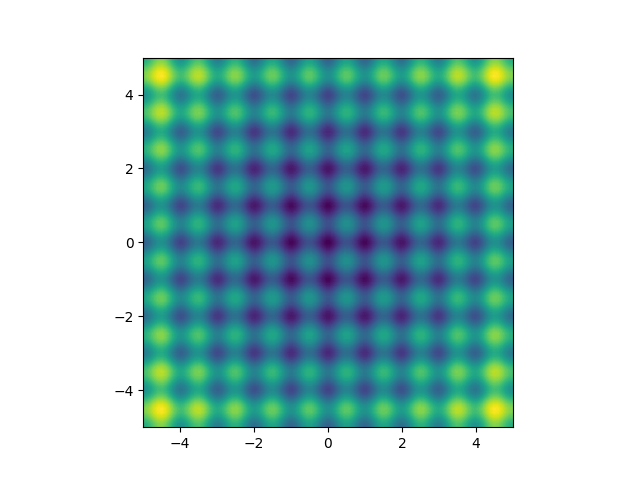

In [12]:
# contour plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X,Y,Z,levels=100,cmap='viridis')
#ax.contour(X,Y,Z,levels=100,colors='white',linewidths=0.5,linestyles='solid')
ax.set_aspect('equal')
plt.show()

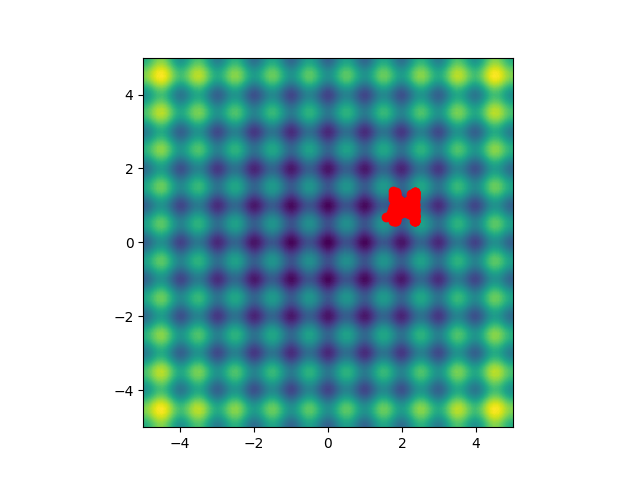

Last point:  [1.8366423  0.59268662]
Gradient at last point:  [-50.07582048 -33.37230214]
Value of f at last point:  26.89720231589105


In [13]:
# define f 
def f(x,y):
    return 20 + x**2 - 10*np.cos(2*np.pi*x) + y**2 - 10*np.cos(2*np.pi*y)

# gradient of f 
def grad_f(x,y):
    return np.array([2*x + 20*np.pi*np.sin(2*np.pi*x),2*y + 20*np.pi*np.sin(2*np.pi*y)])

# gradient descent 
def gradient_descent(x0,y0,learning_rate=0.1,steps=10):
  x = x0
  y = y0
  list_of_points = [(x,y)]
  for i in range(steps):
      grad = grad_f(x,y)
      x = x - learning_rate*grad[0]
      y = y - learning_rate*grad[1]
      list_of_points.append((x,y))
  return list_of_points


x0 = 2.1
y0 = 1.1
steps = 100
learning_rate = 0.01
list_of_points = gradient_descent(x0,y0,learning_rate,steps)
list_of_points = np.array(list_of_points)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.contourf(X,Y,Z,levels=100,cmap='viridis')
ax.set_aspect('equal')
# plot bullet points
ax.plot(list_of_points[:,0],list_of_points[:,1],'o',color='red')
ax.plot(list_of_points[:,0],list_of_points[:,1],color='r')
plt.show()
print("Last point: ", list_of_points[-1])
print("Gradient at last point: ", grad_f(list_of_points[-1][0],list_of_points[-1][1]))
print("Value of f at last point: ", f(list_of_points[-1][0],list_of_points[-1][1]))